In [1]:
!python --version

Python 3.7.7


In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from pandas.plotting import andrews_curves
import pylab
import pandas as pd
import numpy as np
import warnings
import glob
warnings.filterwarnings('ignore')

## Get tables and compute accuracy

In [2]:
import os
import json

filepath='simulation/query_gt.csv'
if os.path.isfile(filepath):
    print ("Query file exist")
    df = pd.read_csv(filepath,index_col=0)
    queryList = list(df[df['form']=='dnf']['query'])
    indexList = [json.loads(l) for l in list(df[df['form']=='dnf']['index'])]
queryList

Query file exist


['(baseball_bat & skis & refrigerator) | wine_glass',
 'book | person',
 'cup & person & remote | bird',
 'handbag & person | train & bicycle',
 'dining_table | person & clock | handbag',
 'bus | person | handbag & truck & clock & chair | tennis_racket | sink',
 'bus & person | cell_phone | bottle',
 '(book & bird) | traffic_light | bowl',
 '(bottle & dining_table) | (bowl & couch & car & fork & bench) | cup',
 'tennis_racket | (spoon & bowl) | tie',
 '(truck & fork & umbrella & book) | (boat & frisbee) | apple | bottle']

In [3]:
print(indexList[0])

[25, 28, 33, 41, 42, 75, 79, 161, 181, 184, 204, 217, 247, 299, 307, 415, 612, 616, 686, 726, 796, 845, 975, 987, 1188, 1230, 1234, 1235, 1238, 1283, 1285, 1315, 1438, 1474, 1485, 1514, 1535, 1542, 1567, 1577, 1619, 1633, 1660, 1816, 1832, 1851, 1973, 2082, 2130, 2149, 2296, 2318, 2343, 2396, 2547, 2576, 2642, 2704, 2720, 2742, 2866, 2901, 2906, 2924, 2989, 3063, 3095, 3139, 3259, 3295, 3341, 3434, 3474, 3493, 3504, 3562, 3567, 3591, 3597, 3602, 3610, 3614, 3628, 3667, 3756, 3768, 3771, 3803, 3872, 3951, 4071, 4095, 4150, 4167, 4225, 4282, 4314, 4350, 4367, 4429, 4477, 4483, 4563, 4564, 4598, 4657, 4688, 4877, 4926, 4981]


## Get runtime

In [4]:
path = 'results/results.csv'
df_cost = pd.read_csv(path)
df_cost

,experiment,workflow,startedAt,finishedAt,duration,resourcesDuration_cpu,resourcesDuration_memory
0,script_base_4_accuracy_80,sqlflow-qmk65,2021-06-23T21:28:00Z,2021-06-23T21:28:36Z,36,49.0,49.0
1,script_base_4_accuracy_80,sqlflow-r79ql,2021-06-23T21:30:44Z,2021-06-23T21:32:22Z,98,171.0,171.0
2,script_base_4_accuracy_80,sqlflow-lmltp,2021-06-23T21:23:15Z,2021-06-23T21:25:34Z,139,255.0,255.0
3,script_base_4_accuracy_80,sqlflow-zxbs6,2021-06-23T21:32:15Z,2021-06-23T21:33:06Z,51,80.0,80.0
4,script_base_4_accuracy_80,sqlflow-kj625,2021-06-23T21:25:27Z,2021-06-23T21:26:35Z,68,113.0,113.0
...,...,...,...,...,...,...,...
157,script_base_5_accuracy_80,sqlflow-nlgqg,2021-06-23T21:34:59Z,2021-06-23T21:35:19Z,20,18.0,18.0
158,script_base_5_accuracy_80,sqlflow-ldwdn,2021-06-23T21:33:21Z,2021-06-23T21:35:05Z,104,182.0,182.0
159,script_base_5_accuracy_80,sqlflow-x49h7,2021-06-23T21:33:12Z,2021-06-23T21:33:22Z,10,2.0,2.0
160,script_base_5_accuracy_80,sqlflow-2wz9n,2021-06-23T21:35:13Z,2021-06-23T21:35:23Z,10,3.0,3.0


In [5]:
df_cost[df_cost['experiment']=='script_opt_1_accuracy_80']['duration'].sum()

294

## Retrieve query index that match the queries

In [6]:
folder = 'tables/'
for file in glob.glob(folder+"*"):
    print(file)
    df = pd.read_csv(file)
    print(df.shape)

tables/opt_10_accuracy_80.csv
(5000, 82)
tables/base_5_accuracy_80.csv
(5000, 82)
tables/opt_9_order_accuracy_80.csv
(5000, 82)
tables/opt_5_accuracy_80.csv
(5000, 82)
tables/opt_1_order_accuracy_80.csv
(5000, 82)
tables/base_4_accuracy_80.csv
(5000, 82)
tables/opt_7_order_accuracy_80.csv
(5000, 82)
tables/base_10_accuracy_80.csv
(5000, 82)
tables/opt_4_accuracy_80.csv
(5000, 82)
tables/opt_10_order_accuracy_80.csv
(5000, 82)
tables/opt_5_order_accuracy_80.csv
(5000, 82)
tables/opt_9_accuracy_80.csv
(5000, 82)
tables/base_6_accuracy_80.csv
(5000, 82)
tables/opt_6_accuracy_80.csv
(5000, 82)
tables/base_9_accuracy_80.csv
(5000, 82)
tables/opt_1_accuracy_80.csv
(5000, 82)
tables/base_1_accuracy_80.csv
(5000, 82)
tables/opt_6_order_accuracy_80.csv
(5000, 82)
tables/base_7_accuracy_80.csv
(5000, 82)
tables/opt_7_accuracy_80.csv
(5000, 82)
tables/opt_4_order_accuracy_80.csv
(5000, 82)


In [7]:
import numpy as np
def getImageIndex(query,df):
    Bxp = parse_expr(query)
    predicates = [str(p) for p in list(Bxp.atoms())]
    print(predicates)
    subset = df[predicates].dropna(how='all')
    subset.replace(0, np.nan, inplace=True)
    subset = pd.notnull(subset)
#     subset[subset != 0] = True
    
    index = [i for i, row in subset.iterrows() if Bxp.subs({p:row[str(p)] for p in list(Bxp.atoms())}) == True ]
    print('len(index)',len(index))
    return index

In [95]:
import glob
import re
import pandas as pd
from sympy.parsing.sympy_parser import parse_expr

constraint = 'accuracy'

path = 'output/coco/summary_'+constraint+'_optimizer.csv'
df_opt = pd.read_csv(path,index_col=0)

path = 'output/coco/summary_order_'+constraint+'_optimizer.csv'
df_order_opt = pd.read_csv(path,index_col=0)

df_result = pd.DataFrame(columns=['name','query_index','query','constraint','bound',\
                                  'len','accuracy','cost','objective_accuracy','objective_cost','result_index'])

table_list = []
query_idx_list = []
folder = 'tables/'
for file in glob.glob(folder+"*"):
    print(file)
    df = pd.read_csv(file)
    print(df.shape)
    
    name = file.split('/')[-1].split('.')[0]
    print('name',name)
    
    # retrieve cost
    cost = df_cost[df_cost['experiment']=='script_'+name]['duration'].sum() #& (df_cost['duration']>10)
    cost = cost / 5

    order = len(name.split('_')) == 5
    print('order',order)
    
    query_idx = int(re.search(r'\d+', name).group(0))
    print(query_idx)
    
    consr_type = re.search(r'.*_([a-z]+)_.*', name).group(1)
    if consr_type != constraint:
        continue
        
    bound = re.search(r'.*_(\d+)', name).group(1)
    query = queryList[query_idx]
    
    if order:
        df_record = df_order_opt
        approach = 'order_opt'
    elif name[:3] == 'opt':
        df_record = df_opt
        approach = 'basic_opt'
    else:
        approach = 'baseline'
        
    # Match objective value with extracted accuracy results
    record = df_record[(df_record['query_index']==query_idx) & (df_record['constraint']==consr_type) & (df_record['approach']=='optimizer')]

    index = getImageIndex(query,df)
    gt = list(filter(lambda x: x<=2000, indexList[query_idx]))
    label = list(filter(lambda x: x<=2000,index))
    intersection = list(set.intersection(set(gt), set(label)))
    print('intersect',len(intersection))
    print('total',len(gt))
    accu = len(intersection)/len(gt)
    print('accu',accu)
    result_idx = ','.join([str(i) for i in index])

    new_row = pd.DataFrame([{'name':name,'query_index':query_idx,'query':query,\
                             'constraint':constraint,'bound':bound,'approach':approach,'len':len(index),\
                             'accuracy':round(accu,4),'cost':cost,'objective_accuracy':round(record.accuracy.values[0],4),\
                             'objective_cost':int(record['cost'].values[0]),'result_index':result_idx}])
#     print(new_row)
    df_result = df_result.append(new_row, ignore_index=True)
    
    print('----------')
    print()
    

tables/opt_10_accuracy_80.csv
(5000, 82)
name opt_10_accuracy_80
order False
10
['bottle', 'fork', 'umbrella', 'apple', 'book', 'frisbee', 'boat', 'truck']
len(index) 471
intersect 130
total 183
accu 0.7103825136612022
----------

tables/base_5_accuracy_80.csv
(5000, 82)
name base_5_accuracy_80
order False
5
['tennis_racket', 'person', 'bus', 'clock', 'chair', 'truck', 'handbag', 'sink']
len(index) 1993
intersect 785
total 1157
accu 0.6784788245462403
----------

tables/opt_9_order_accuracy_80.csv
(5000, 82)
name opt_9_order_accuracy_80
order True
9
['tennis_racket', 'spoon', 'tie', 'bowl']
len(index) 333
intersect 125
total 167
accu 0.7485029940119761
----------

tables/opt_5_accuracy_80.csv
(5000, 82)
name opt_5_accuracy_80
order False
5
['tennis_racket', 'person', 'bus', 'clock', 'chair', 'truck', 'handbag', 'sink']
len(index) 2013
intersect 795
total 1157
accu 0.6871218668971478
----------

tables/opt_1_order_accuracy_80.csv
(5000, 82)
name opt_1_order_accuracy_80
order True
1
['bo

In [96]:
df_result

,name,query_index,query,constraint,bound,len,accuracy,cost,objective_accuracy,objective_cost,result_index,approach
0,opt_10_accuracy_80,10,(truck & fork & umbrella & book) | (boat & fri...,accuracy,80,471,0.7104,165.6,0.8395,237,"2,23,33,50,57,61,62,75,79,93,96,98,104,106,132...",basic_opt
1,base_5_accuracy_80,5,bus | person | handbag & truck & clock & chair...,accuracy,80,1993,0.6785,74.6,0.9625,78,"5,7,8,9,10,14,17,22,24,27,29,30,33,35,36,41,42...",baseline
2,opt_9_order_accuracy_80,9,tennis_racket | (spoon & bowl) | tie,accuracy,80,333,0.7485,39.0,0.9342,106,"8,9,27,42,43,47,54,64,83,86,94,95,108,118,133,...",order_opt
3,opt_5_accuracy_80,5,bus | person | handbag & truck & clock & chair...,accuracy,80,2013,0.6871,81.0,0.9625,78,"5,7,8,9,10,14,17,22,24,26,27,29,30,33,35,36,41...",basic_opt
4,opt_1_order_accuracy_80,1,book | person,accuracy,80,2651,0.9072,57.0,0.8218,133,"0,2,5,7,8,9,10,11,12,13,14,17,22,24,26,27,28,2...",order_opt
5,base_4_accuracy_80,4,dining_table | person & clock | handbag,accuracy,80,620,0.5921,132.6,0.8506,106,"0,9,10,21,25,28,32,40,42,55,80,87,96,100,101,1...",baseline
6,opt_7_order_accuracy_80,7,(book & bird) | traffic_light | bowl,accuracy,80,437,0.7035,85.4,0.8019,155,"13,25,28,55,75,85,89,96,100,111,145,146,176,17...",order_opt
7,base_10_accuracy_80,10,(truck & fork & umbrella & book) | (boat & fri...,accuracy,80,263,0.4699,155.4,0.8392,141,"2,23,57,75,79,96,98,106,132,133,143,170,181,20...",baseline
8,opt_4_accuracy_80,4,dining_table | person & clock | handbag,accuracy,80,599,0.5740,33.8,0.8506,106,"0,9,10,21,28,32,40,42,55,80,87,96,100,101,104,...",basic_opt
9,opt_10_order_accuracy_80,10,(truck & fork & umbrella & book) | (boat & fri...,accuracy,80,457,0.7158,119.6,0.8392,141,"2,23,33,50,57,61,62,75,93,96,98,104,106,120,13...",order_opt


In [97]:
df_result.to_csv('results/statistics_accuracy.csv')

## Model performance

In [98]:
df_model = pd.read_csv('repository/model_stats.csv',index_col=0)
df_model

,frisbee,traffic light,stop sign,handbag,refrigerator,cost,tennis racket,laptop,snowboard,microwave,...,bicycle,cow,sheep,potted plant,giraffe,bus,boat,orange,backpack,bottle
model_64,0.84,0.66,0.84,0.38,0.70,144.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_175,NaN,NaN,NaN,NaN,NaN,104.0,0.57,0.64,0.23,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_45,NaN,NaN,NaN,NaN,NaN,113.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_159,NaN,NaN,NaN,0.05,NaN,77.0,0.57,0.64,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_154,NaN,0.46,NaN,NaN,NaN,41.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
model_76,NaN,0.66,NaN,NaN,0.70,121.0,0.80,NaN,0.69,NaN,...,NaN,NaN,NaN,NaN,0.87,NaN,NaN,NaN,NaN,NaN
model_195,0.71,NaN,NaN,NaN,0.29,59.0,NaN,0.64,NaN,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,0.34,NaN,0.04,NaN
model_26,NaN,NaN,0.84,NaN,NaN,194.0,NaN,NaN,NaN,NaN,...,0.62,NaN,NaN,0.64,NaN,NaN,0.61,NaN,NaN,NaN
model_47,NaN,NaN,NaN,NaN,NaN,194.0,NaN,NaN,NaN,0.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
query_idx = 1
bound = 0.8
subset = df_opt[(df_opt.query_index==query_idx)]
selected_model = subset.selected_model.values[0]
assignment = {item.split('.')[0].replace('_',' '):item.split('.')[1] for item in selected_model.split('|')}
print(assignment)
for k,v in assignment.items():
    print(df_model.loc[v,k])
subset

{'book': 'model_116', 'person': 'model_15'}
0.19
0.78


,query_index,query,#predicate,mdist,qdist,constraint,bound,approach,selected_model,pareto_model,#pareto,non_pareto_model,#non_pareto,pareto_ratio,accuracy,cost,optimization_time,data_process_time
0,1,book | person,2,uniform,uniform,accuracy,0.8,optimizer,book.model_116|person.model_15,book.model_116|person.model_15,2,NaN,0,1.0,0.8218,145.0,0.0141,0.0031


In [101]:
bound = 0.8
for idx in [1,4,5,6,7,9,10]:
    print('query '+str(idx))
    subset = df_opt[(df_opt.query_index==idx)]
    print(subset['query'].values[0])
    selected_model = subset.selected_model.values[0]
    assignment = {item.split('.')[0].replace('_',' '):item.split('.')[1] for item in selected_model.split('|')}
    print(assignment)
    for k,v in assignment.items():
        print(k,v)
        print(df_model.loc[v,k])
    print('==========')
    

query 1
book | person
{'book': 'model_116', 'person': 'model_15'}
book model_116
0.19
person model_15
0.78
query 4
dining_table | person & clock | handbag
{'person': 'model_15', 'clock': 'model_15', 'dining table': 'model_15', 'handbag': 'model_15'}
person model_15
0.78
clock model_15
0.74
dining table model_15
0.43
handbag model_15
0.38
query 5
bus | person | handbag & truck & clock & chair | tennis_racket | sink
{'sink': 'model_144', 'truck': 'model_144', 'handbag': 'model_144', 'person': 'model_144', 'clock': 'model_144', 'bus': 'model_144', 'chair': 'model_178', 'tennis racket': 'model_178'}
sink model_144
0.54
truck model_144
0.21
handbag model_144
0.05
person model_144
0.62
clock model_144
0.71
bus model_144
0.5
chair model_178
0.27
tennis racket model_178
0.57
query 6
bus & person | cell_phone | bottle
{'person': 'model_8', 'bottle': 'model_8', 'cell phone': 'model_8', 'bus': 'model_8'}
person model_8
0.78
bottle model_8
0.6
cell phone model_8
0.57
bus model_8
0.77
query 7
(book

## Plot objectives vs. accu

In [102]:
from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.dpi'] = 200

def scatter(df,ax,legend=False):
    
#     fig, ax = plt.subplots()
    for index,row in df.iterrows():
        ax.scatter(row.accu,row.objective_cost,label=row['approach'])
#     ax.xlabel("cost")
#     plt.ylabel('accuracy')
#     ax.set_ylim((0.5,1))
    if legend:
        ax.legend()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [103]:
import numpy as np

def barplot(idx,subset,ax,y,legend=False):

    labels = ['baseline','basic_opt','order_opt']
#     subset = df_result[(df_result.query_index==idx) & (df_result.constraint==constraint) & (df_result.bound==bound)]

    objective = []
    real = []
#     for i,row in subset.iterrows():
#     print(subset)
    for l in labels:
        objective.append(round(subset[subset.approach==l]['objective_'+y].values[0],2))
        real.append(round(subset[subset.approach==l][y].values[0],2))

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars
    
    rects1 = ax.bar(x - width/2, objective, width, label=labels[0])
    rects2 = ax.bar(x + width/2, real, width, label=labels[1])

    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax.set_ylabel('Accuracy')
    ax.set_title('Q'+str(idx+1))
    ax.set_xticks(x)
    if y == 'accuracy':
        ax.set_yticks([0,0.5,1.0])
    else:
        ax.set_yticks([0,100,220])
    
    ax.set_xticklabels(labels)
    if legend:
        ax.legend()

    ax.bar_label(rects1, padding=3,fontsize=7,label_type='edge')# center
    ax.bar_label(rects2, padding=3,fontsize=7,label_type='edge')
    
#     ax.grid()


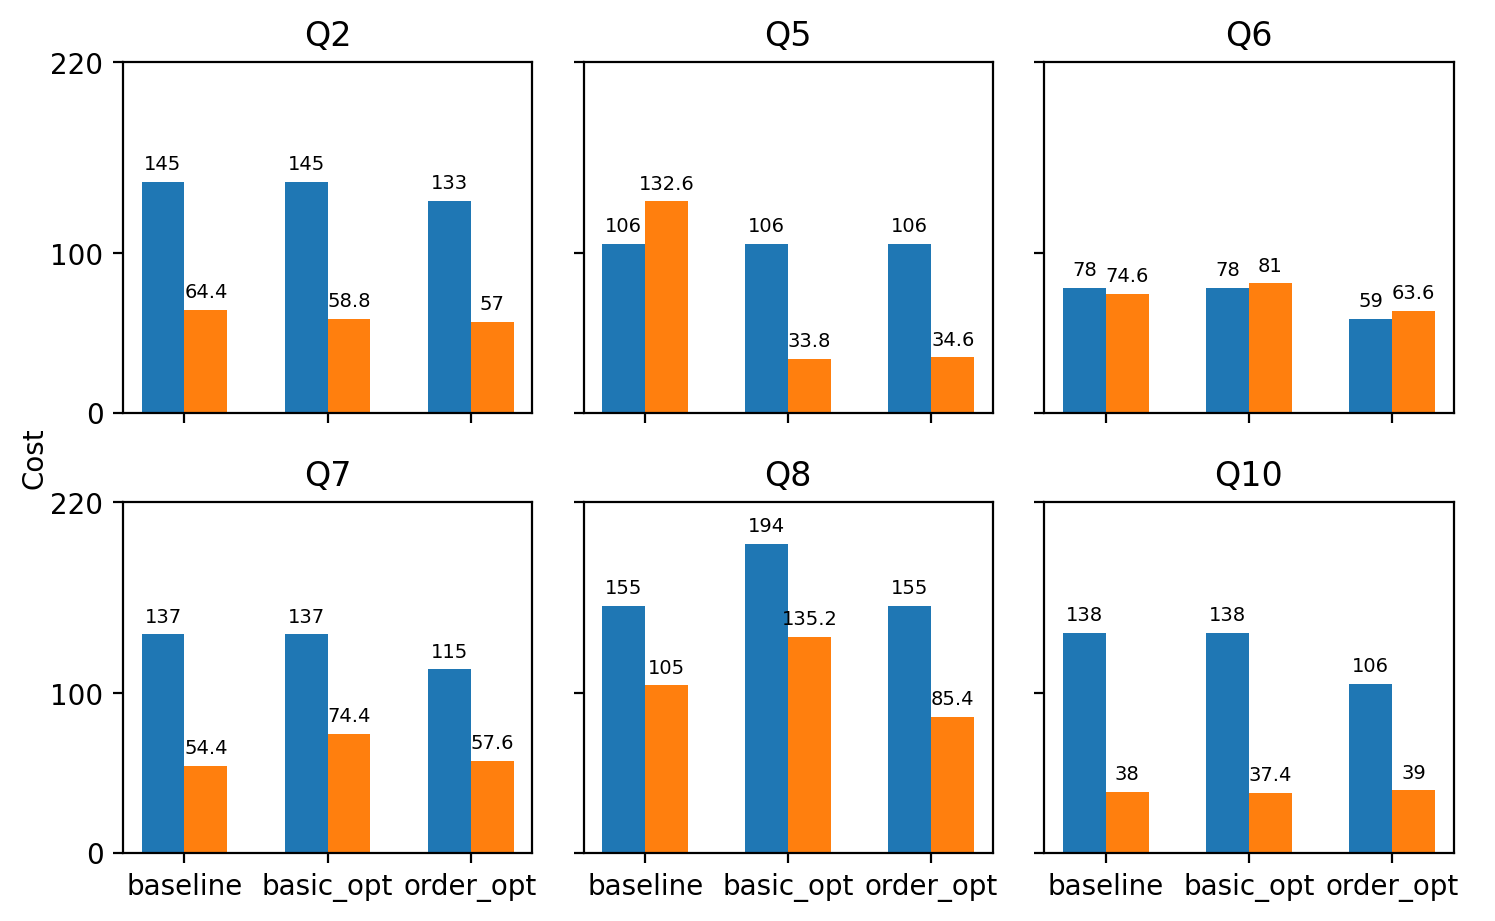

In [104]:
constraint = 'accuracy'
bound = '80'
ncols = 3
f, axes = plt.subplots(nrows = 2, ncols = ncols, sharex=True, sharey = True,figsize=(8,5))

for i,idx in enumerate([1,4,5,6,7,9]):
    subset = df_result[(df_result.query_index==idx) & (df_result.constraint==constraint) & (df_result.bound==bound)]
#     barplot(idx,subset,axes[i//ncols, i%ncols],legend=False)
    barplot(idx,subset,axes[i//ncols,i%ncols],'cost',legend=False)

f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Cost")
f.tight_layout()

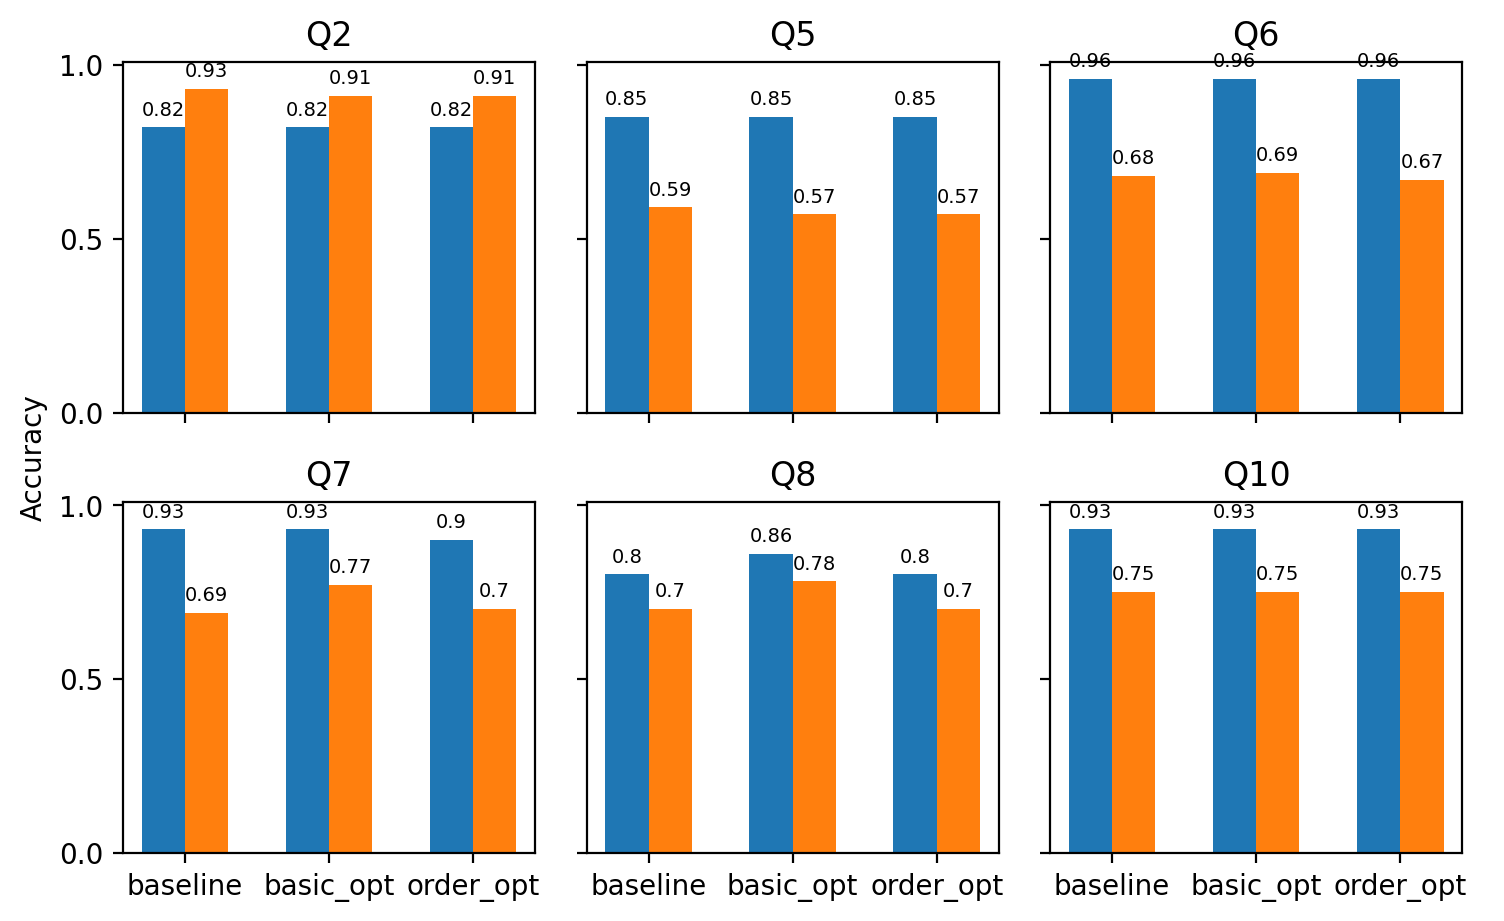

In [105]:
constraint = 'accuracy'
bound = '80'
ncols = 3
f, axes = plt.subplots(nrows = 2, ncols = ncols, sharex=True, sharey = True,figsize=(8,5))

for i,idx in enumerate([1,4,5,6,7,9]):
    subset = df_result[(df_result.query_index==idx) & (df_result.constraint==constraint) & (df_result.bound==bound)]
#     barplot(idx,subset,axes[i//ncols, i%ncols],legend=False)
    barplot(idx,subset,axes[i//ncols,i%ncols],'accuracy',legend=False)

f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Accuracy")
f.tight_layout()

## Runtime

## Plot accu vs. cost

In [153]:
from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.dpi'] = 200

def scatter(idx,df,ax,legend=False):
    
    labels = ['baseline','basic_opt','order_opt']

    for l in labels:
        row = subset[subset.approach==l]
        ax.scatter(row.cost.values[0],row.accuracy.values[0],label=l)
    ax.set_xticks([0,300,600])
    ax.set_xticklabels([0,300,600],fontsize=11)
    ax.set_yticks([0.1, 0.5, 1.0])
    ax.set_title('Q'+str(idx+1))
#     ax.set_ylim((0.5,1))
    if legend:
        ax.legend()
#     ax.yaxis.set_major_locator(MaxNLocator(integer=True))

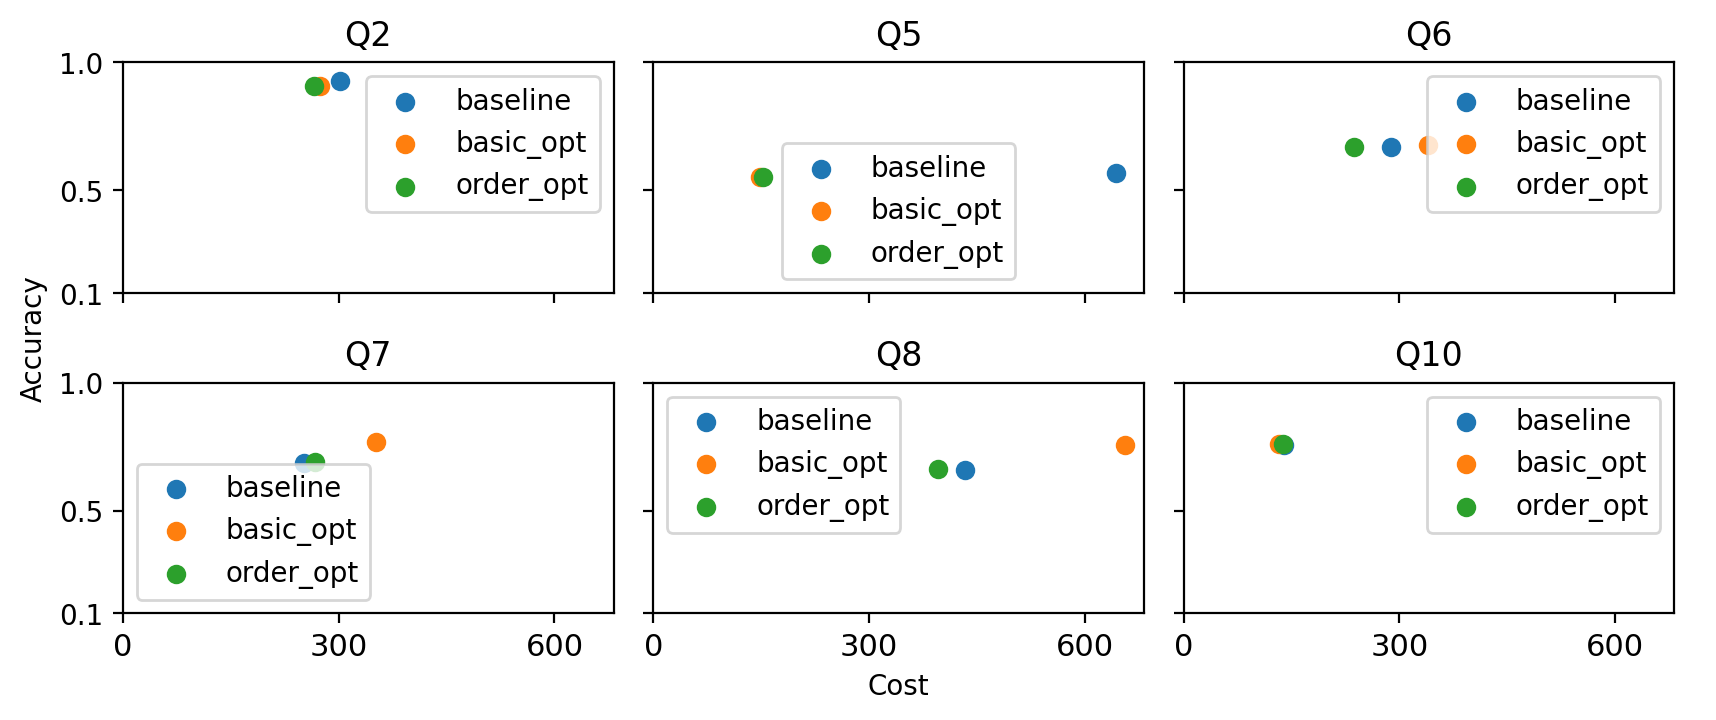

In [154]:
constraint = 'accuracy'
bound = '80'
ncols = 3
f, axes = plt.subplots(nrows = 2, ncols = ncols, sharex=True, sharey = True,figsize=(9,4))
# plt.setp(axes, xticks=[0.1, 0.5, 1.2],yticks=[128,170,220])

for i,idx in enumerate([1,4,5,6,7,9]):
    subset = df_result[(df_result.query_index==idx) & (df_result.constraint==constraint) & (df_result.bound==bound)]
    scatter(idx,subset,axes[i//ncols, i%ncols],legend=True)
    
f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Cost")
plt.ylabel("Accuracy")
f.tight_layout()

## Retrieve task name

In [16]:
names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', \
			'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', \
			'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', \
			'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', \
			'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', \
			'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', \
			'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', \
			'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', \
			'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', \
			'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'toothbrush']

In [17]:
len(names)

79

In [18]:
model_config = pd.read_csv('yolov3/convert/model_config_task.csv')
tasks = model_config['tasks']

In [19]:
task_names = [','.join([names[int(cov)] for cov in task.split(' ') if cov != '']) for task in tasks ]

In [20]:
model_config['task_names'] = task_names

In [21]:
model_config.to_csv('yolov3/convert/model_config_task_names.csv')

In [22]:
model_stats = pd.read_csv('yolov3/convert/model_stats_new.csv',index_col=0)
model_stats.head()

FileNotFoundError: [Errno 2] File yolov3/convert/model_stats_new.csv does not exist: 'yolov3/convert/model_stats_new.csv'

In [ ]:
model_stats[model_stats['traffic light']>0][['traffic light']]

In [ ]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer','order_opt']


def load_cost(m_dist,q_dist,approach):
    filepath = 'output/summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    if approach == 'order_opt':
        filepath = 'output/summary_order_cost_'+m_dist+'_'+q_dist+'_optimizer.csv'
    try:
        df = pd.read_csv(filepath,index_col=0)
    except Exception as e:
        filepath = 'output/summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'_a=5.csv'
        df = pd.read_csv(filepath,index_col=0)
        
    print(df.shape)
#     print(df.head())
    return df

df_list = []
label_list = []
for q in q_dist:
    for m in m_dist:
        for app in approach:
            df_list.append(load_cost(m,q,app))
            if app == 'baseline_pareto':
                app = 'baseline'
            label_list.append(app+'_'+m+'_'+q)
print(label_list)

In [ ]:
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots()

for i in range(len(df_list)):
    ax.scatter(df_list[i]['cost'], df_list[i]['accuracy'],label=label_list[i])

plt.ylabel('Accuracy')
plt.xlabel('Cost')
plt.title('Performance of query results when cost is constrained')
plt.legend()

In [ ]:
# q_dist = ['uniform','power_law']
# m_dist = q_dist
# approach = ['baseline_pareto','optimizer']


# def load_cost(m_dist,q_dist,approach):
#     filepath = 'output/summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
#     try:
#         df = pd.read_csv(filepath,index_col=0)
#     except Exception as e:
#         filepath = 'output/summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'_a=5.csv'
#         df = pd.read_csv(filepath,index_col=0)

#     print(df.shape)
# #     print(df.head())
#     return df

# df_list = []
# label_list = []
# for q in q_dist:
#     for m in m_dist:
#         for app in approach:
#             df_list.append(load_cost(m,q,app))
#             if app == 'baseline_pareto':
#                 app = 'baseline'
#             label_list.append(app+'_'+m+'_'+q)
# print(label_list)

In [ ]:
# plt.rcParams['figure.dpi'] = 100
# fig, ax = plt.subplots()

# for i in range(len(df_list)):
#     ax.scatter(df_list[i]['cost'], df_list[i]['accuracy'],label=label_list[i])

# plt.ylabel('Accuracy')
# plt.xlabel('Cost')
# plt.title('Performance of query results when cost is constrained')
# # plt.yscale('logit')
# plt.legend()

### Boxplot on the objective dimension: accuracy

In [ ]:
def boxplot(com_dists,data,max_y=0,ylabel='Accuracy',constraint='Cost',size=14,path='',x_offset=0,y_offset=0):
    fig, ax1 = plt.subplots(figsize=(7, 6))
    fig.canvas.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
#         title=ylabel+' of query results when '+constraint+' is constrained',
        xlabel='Combinations (m_dist:q_dist)',
        ylabel=ylabel,
    )
    ax1.xaxis.get_label().set_fontsize(size)
    ax1.yaxis.get_label().set_fontsize(size)

    # Now fill the boxes with desired colors
    box_colors = ['#2694ab', '#e59572']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    means = [np.mean(x) for x in data]
#     print(means)
    # pylab.scatter(range(1,len(data)+1), means)

    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                 color='w', marker='X', markeredgecolor='k',markersize=10)

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = max_y * 1.1
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(np.repeat(comb_dists, 2),
                        rotation=45, fontsize=size)
    ax1.tick_params(labelsize=size)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    upper_labels = [str(round(s, 3)) for i,s in enumerate(means)]
    weights = ['bold', 'semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 2
        ax1.text(pos[tick], .95, upper_labels[tick],
                 transform=ax1.get_xaxis_transform(),
                 horizontalalignment='center', size='medium',
                 weight=weights[k], color=box_colors[k])
    # Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    # Finally, add a basic legend
    fig.text(0.79-x_offset, 0.461-y_offset, 'Baseline',
             backgroundcolor=box_colors[0], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.417-y_offset, 'Optimizer',
             backgroundcolor=box_colors[1],
             color='white', weight='roman', size='medium')
    fig.text(0.79-x_offset, 0.374-y_offset, 'x', color='white', backgroundcolor='silver',
             weight='roman', size='medium')
    fig.text(0.81-x_offset, 0.374-y_offset, ' Avg.', color='black', weight='roman',
             size='medium')
    plt.tight_layout()
    
    plt.savefig(path,format='eps')

    plt.show()

In [ ]:
comb_dists = []
data = []
i=0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['accuracy'])
            i+=1
print(comb_dists)
ylabel='Accuracy'
constraint='cost'
print(ylabel+' of query results when '+constraint+' is constrained')
boxplot(comb_dists,data,max_y=max(data[0]),
        ylabel='Accuracy',constraint='cost',
       path="image/accuacy_vs_approaches_constraint_cost.eps")


## Boxplot two optimizer

In [ ]:
def boxplot(com_dists,data,max_y=0,ylabel='Accuracy',constraint='Cost',size=14,path='',x_offset=0,y_offset=0):
    fig, ax1 = plt.subplots(figsize=(9, 6))
    fig.canvas.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
#         title=ylabel+' of query results when '+constraint+' is constrained',
        xlabel='Combinations (m_dist:q_dist)',
        ylabel=ylabel,
    )
    ax1.xaxis.get_label().set_fontsize(size)
    ax1.yaxis.get_label().set_fontsize(size)

    # Now fill the boxes with desired colors
    box_colors = ['#2694ab', '#e59572','#e16162']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    means = [np.mean(x) for x in data]
#     print(means)
    # pylab.scatter(range(1,len(data)+1), means)
    print('num_boxes',num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
#         print(box.get_xdata())
#         print(box.get_ydata())
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 3]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                 color='w', marker='X', markeredgecolor='k',markersize=10)

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = max_y * 1.03
    bottom = 0.7
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(np.repeat(comb_dists, 3),
                        rotation=45, fontsize=size)
    ax1.tick_params(labelsize=size)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    upper_labels = [str(round(s, 3)) for i,s in enumerate(means)]
    weights = ['bold', 'semibold','semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 3
        ax1.text(pos[tick], .95, upper_labels[tick],
                 transform=ax1.get_xaxis_transform(),
                 horizontalalignment='center', size='medium',
                 weight=weights[k], color=box_colors[k])
    # Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    # Finally, add a basic legend
    fig.text(0.79-x_offset, 0.5-y_offset, 'Baseline',
             backgroundcolor=box_colors[0], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.461-y_offset, 'Optimizer',
             backgroundcolor=box_colors[1], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.417-y_offset, 'Order_Opt',
             backgroundcolor=box_colors[2],
             color='white', weight='roman', size='medium')
    fig.text(0.79-x_offset, 0.374-y_offset, 'x', color='white', backgroundcolor='silver',
             weight='roman', size='medium')
    fig.text(0.81-x_offset, 0.374-y_offset, ' Avg.', color='black', weight='roman',
             size='medium')
    plt.tight_layout()
    
    plt.savefig(path,format='eps')

    plt.show()

In [ ]:
comb_dists = []
data = []
i=0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['accuracy'])
            i+=1
print(comb_dists)
ylabel='Accuracy'
constraint='cost'
print(ylabel+' of query results when '+constraint+' is constrained')
boxplot(comb_dists,data,max_y=max(data[0]),
        ylabel='Accuracy',constraint='cost',
       path="image/accuacy_vs_approaches_constraint_cost.eps")

## Pareto

In [ ]:
def boxplot(com_dists,data,max_y=0,ylabel='Accuracy',constraint='Cost',size=14,path='',x_offset=0,y_offset=0):
    fig, ax1 = plt.subplots(figsize=(9, 6))
    fig.canvas.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
#         title=ylabel+' of query results when '+constraint+' is constrained',
        xlabel='Combinations (m_dist:q_dist)',
        ylabel=ylabel,
    )
    ax1.xaxis.get_label().set_fontsize(size)
    ax1.yaxis.get_label().set_fontsize(size)

    # Now fill the boxes with desired colors
    box_colors = ['#2694ab', '#e59572','#e16162']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    means = [np.mean(x) for x in data]
#     print(means)
    # pylab.scatter(range(1,len(data)+1), means)
    print('num_boxes',num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
#         print(box.get_xdata())
#         print(box.get_ydata())
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 3]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                 color='w', marker='X', markeredgecolor='k',markersize=10)

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = max_y * 1.1
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(np.repeat(comb_dists, 3),
                        rotation=45, fontsize=size)
    ax1.tick_params(labelsize=size)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    upper_labels = [str(round(s, 3)) for i,s in enumerate(means)]
    weights = ['bold', 'semibold','semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 3
        ax1.text(pos[tick], .95, upper_labels[tick],
                 transform=ax1.get_xaxis_transform(),
                 horizontalalignment='center', size='medium',
                 weight=weights[k], color=box_colors[k])
    # Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    # Finally, add a basic legend
    fig.text(0.89-x_offset, 0.8-y_offset, 'Baseline',
             backgroundcolor=box_colors[0], color='white', weight='roman',
             size='medium')
    fig.text(0.89-x_offset, 0.761-y_offset, 'Optimizer',
             backgroundcolor=box_colors[1], color='white', weight='roman',
             size='medium')
    fig.text(0.89-x_offset, 0.717-y_offset, 'Order_Opt',
             backgroundcolor=box_colors[2],
             color='white', weight='roman', size='medium')
    fig.text(0.89-x_offset, 0.674-y_offset, 'x', color='white', backgroundcolor='silver',
             weight='roman', size='medium')
    fig.text(0.91-x_offset, 0.674-y_offset, ' Avg.', color='black', weight='roman',
             size='medium')
    plt.tight_layout()
    
    plt.savefig(path,format='eps')

    plt.show()

In [ ]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer','order_opt']

comb_dists = []
data = []
i = 0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['pareto_ratio'])
            i+=1
print(comb_dists)

boxplot(comb_dists,data,max_y=max([max(x) for x in data]),
        ylabel='Pareto ratio',constraint='cost', x_offset=0.06,
       path='image/pareto_vs_approaches_constraint_cost.eps')

In [ ]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']


comb_dists = []
data = []
i=0

for a,app in enumerate(approach):
    for i,m in enumerate(m_dist):
        for j,q in enumerate(q_dist):
            if app == 'baseline_pareto':
                app = 'baseline'
            comb_dists.append(app+'-'+m+':'+q)
            data.append(df_list[4*i+2*j+a][['#predicate','optimization_time']])
print(comb_dists)

In [ ]:
import seaborn as sns
plt.rcParams['figure.dpi'] = 200
df = pd.DataFrame(columns=['#predicate','approach','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['approach'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)

    
# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='approach')
# g.set_title("Runtime against #predicate in a query when constrained on cost",fontsize=8)
# plt.legend(bbox_to_anchor=(0.9, 0.8))
g.legend(loc='upper center', bbox_to_anchor=(0.45, 1.45),
          ncol=2, fancybox=True, shadow=True,prop={'size': 9})
g.set_yscale("log")
g.tick_params(labelsize=11)
g.xaxis.get_label().set_fontsize(11)
g.yaxis.get_label().set_fontsize(11)
plt.tight_layout()
plt.savefig('image/runtime_vs_approaches_constraint_cost.eps',format='eps')

In [ ]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']

comb_dists = []
data = []
i=0
for m in m_dist:
    for q in q_dist:
        comb_dists.append(m+':'+q)
        data.append(df_list[i*2+1][['#predicate','optimization_time']])
        i+=1
print(comb_dists)

In [ ]:
plt.rcParams['figure.dpi'] = 200
df = pd.DataFrame(columns=['#predicate','optimizer','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['optimizer'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)

# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='optimizer')
# g.set_title("Runtime against #predicate in a query when constrained on cost",fontsize=8)
g.legend(loc='upper center', bbox_to_anchor=(0.6, 0.2),
          ncol=2, fancybox=True, shadow=True,prop={'size': 9})
g.set_yscale("log")

g.tick_params(labelsize=11)
g.xaxis.get_label().set_fontsize(11)
g.yaxis.get_label().set_fontsize(11)
plt.tight_layout()
plt.savefig('image/runtime_vs_optimizers_constraint_cost.eps',format='eps')

In [ ]:
q_dist = ['uniform']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']

def load(m_dist,q_dist,approach):
    filepath = 'output/summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    df = pd.read_csv(filepath,index_col=0)
#     print(df.head())
    return df[['#predicate','optimization_time']]

comb_dists = []
data = []
i=0
for m in m_dist:
    for q in q_dist:
        for app in approach:
            comb_dists.append(app)
            data.append(df_list[i][['#predicate','optimization_time']])
            i+=1
print(comb_dists)

plt.rcParams['figure.dpi'] = 200
df = pd.DataFrame(columns=['#predicate','approach','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['approach'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)
    
print(df.shape)
print(df.head())
    
# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='approach')
g.set_title("Runtime against #predicate in a query when constrained on cost",fontsize=8)
g.set_yscale("log")

## Constraint on accuracy, minmize cost

In [ ]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']


def load_accu(m_dist,q_dist,approach):
    filepath = 'output/summary_accuracy_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    df = pd.read_csv(filepath,index_col=0)
    print(df.shape)
#     print(df.head())
    return df

df_list = []
label_list = []
for q in q_dist:
    for m in m_dist:
        for app in approach:
            df_list.append(load_accu(m,q,app))
            label_list.append(app+'_'+m+'_'+q)
print(label_list)

In [ ]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer','order_opt']


def load_cost(m_dist,q_dist,approach):
    filepath = 'output/summary_accuracy_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    if approach == 'order_opt':
        filepath = 'output/summary_order_accuracy_'+m_dist+'_'+q_dist+'_optimizer.csv'
    try:
        df = pd.read_csv(filepath,index_col=0)
    except Exception as e:
        filepath = 'output/summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'_a=5.csv'
        df = pd.read_csv(filepath,index_col=0)
        
    print(df.shape)
#     print(df.head())
    return df

df_list = []
label_list = []
for q in q_dist:
    for m in m_dist:
        for app in approach:
            df_list.append(load_cost(m,q,app))
            if app == 'baseline_pareto':
                app = 'baseline'
            label_list.append(app+'_'+m+'_'+q)
print(label_list)

In [ ]:
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots()

for i in range(len(df_list)):
    ax.scatter(df_list[i]['cost'], df_list[i]['accuracy'],label=label_list[i])

plt.ylabel('Accuracy')
plt.xlabel('Cost')
# plt.yscale('logit')
plt.legend()

In [ ]:
def boxplot(com_dists,data,max_y=0,ylabel='Accuracy',constraint='Cost',size=14,path='',x_offset=0,y_offset=0):
    fig, ax1 = plt.subplots(figsize=(9, 6))
    fig.canvas.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
#         title=ylabel+' of query results when '+constraint+' is constrained',
        xlabel='Combinations (m_dist:q_dist)',
        ylabel=ylabel,
    )
    ax1.xaxis.get_label().set_fontsize(size)
    ax1.yaxis.get_label().set_fontsize(size)

    # Now fill the boxes with desired colors
    box_colors = ['#2694ab', '#e59572','#e16162']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    means = [np.mean(x) for x in data]
#     print(means)
    # pylab.scatter(range(1,len(data)+1), means)
    print('num_boxes',num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
#         print(box.get_xdata())
#         print(box.get_ydata())
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 3]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                 color='w', marker='X', markeredgecolor='k',markersize=10)

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = max_y * 0.2
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(np.repeat(comb_dists, 3),
                        rotation=45, fontsize=size)
    ax1.tick_params(labelsize=size)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    upper_labels = [str(round(s, 3)) for i,s in enumerate(means)]
    weights = ['bold', 'semibold','semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 3
        ax1.text(pos[tick], .95, upper_labels[tick],
                 transform=ax1.get_xaxis_transform(),
                 horizontalalignment='center', size='medium',
                 weight=weights[k], color=box_colors[k])
    # Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    # Finally, add a basic legend
#     ax1.set_yscale('log')
    fig.text(0.79-x_offset, 0.5-y_offset, 'Baseline   ',
             backgroundcolor=box_colors[0], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.461-y_offset, 'Optimizer ',
             backgroundcolor=box_colors[1], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.417-y_offset, 'Order_Opt',
             backgroundcolor=box_colors[2],
             color='white', weight='roman', size='medium')
    fig.text(0.79-x_offset, 0.374-y_offset, 'x', color='white', backgroundcolor='silver',
             weight='roman', size='medium')
    fig.text(0.81-x_offset, 0.374-y_offset, ' Avg.', color='black', weight='roman',
             size='medium')
    plt.tight_layout()
    
    plt.savefig(path,format='eps')

    plt.show()

In [ ]:

comb_dists = []
data = []
i=0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['cost'])
            i+=1
print(comb_dists)

boxplot(comb_dists,data,max_y=max([max(x) for x in data]),
        ylabel='Cost',constraint='accuracy',
       path='image/cost_vs_approaches_constraint_accu.eps',
       y_offset=-0.2)

## Pareto ratio

In [ ]:
def boxplot(com_dists,data,max_y=0,ylabel='Accuracy',constraint='Cost',size=14,path='',x_offset=0,y_offset=0):
    fig, ax1 = plt.subplots(figsize=(9, 6))
    fig.canvas.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
#         title=ylabel+' of query results when '+constraint+' is constrained',
        xlabel='Combinations (m_dist:q_dist)',
        ylabel=ylabel,
    )
    ax1.xaxis.get_label().set_fontsize(size)
    ax1.yaxis.get_label().set_fontsize(size)

    # Now fill the boxes with desired colors
    box_colors = ['#2694ab', '#e59572','#e16162']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    means = [np.mean(x) for x in data]
#     print(means)
    # pylab.scatter(range(1,len(data)+1), means)
    print('num_boxes',num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
#         print(box.get_xdata())
#         print(box.get_ydata())
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 3]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                 color='w', marker='X', markeredgecolor='k',markersize=10)

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = max_y * 1.1
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(np.repeat(comb_dists, 3),
                        rotation=45, fontsize=size)
    ax1.tick_params(labelsize=size)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    upper_labels = [str(round(s, 3)) for i,s in enumerate(means)]
    weights = ['bold', 'semibold','semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 3
        ax1.text(pos[tick], .95, upper_labels[tick],
                 transform=ax1.get_xaxis_transform(),
                 horizontalalignment='center', size='medium',
                 weight=weights[k], color=box_colors[k])
    # Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    # Finally, add a basic legend
    fig.text(0.79-x_offset, 0.5-y_offset, 'Baseline',
             backgroundcolor=box_colors[0], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.461-y_offset, 'Optimizer',
             backgroundcolor=box_colors[1], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.417-y_offset, 'Order_Opt',
             backgroundcolor=box_colors[2],
             color='white', weight='roman', size='medium')
    fig.text(0.79-x_offset, 0.374-y_offset, 'x', color='white', backgroundcolor='silver',
             weight='roman', size='medium')
    fig.text(0.81-x_offset, 0.374-y_offset, ' Avg.', color='black', weight='roman',
             size='medium')
    plt.tight_layout()
    
    plt.savefig(path,format='eps')

    plt.show()

In [ ]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer','order_opt']


comb_dists = []
data = []
i=0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['pareto_ratio'])
            i+=1
print(comb_dists)

boxplot(comb_dists,data,max_y=max([max(x) for x in data]),
        ylabel='Pareto ratio',constraint='cost',
        path='image/pareto_vs_approaches_constraint_cost.eps',
       x_offset=0.07)

### Runtime

In [ ]:
q_dist = ['uniform','power_law']
m_dist = q_dist

def load(m_dist,q_dist,approach):
    filepath = 'repository/run_summary_accuracy_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    df = pd.read_csv(filepath,index_col=0)
#     print(df.head())
    return df[['#predicate','optimization_time']]

comb_dists = []
data = []
i=0
for m in m_dist:
    for q in q_dist:
        comb_dists.append(m+':'+q)
        data.append(df_list[i*2+1][['#predicate','optimization_time']])
        i+=1
print(comb_dists)


In [ ]:
plt.rcParams['figure.dpi'] = 200
df = pd.DataFrame(columns=['#predicate','optimizer','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['optimizer'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)

# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='optimizer')
# g.set_title("Runtime against #predicate in a query when constrained on accuarcy",fontsize=8)
g.set_yscale("log")
g.legend(loc='upper center', bbox_to_anchor=(0.6, 0.2),
          ncol=2, fancybox=True, shadow=True,prop={'size': 9})
g.set_yscale("log")

g.tick_params(labelsize=11)
g.xaxis.get_label().set_fontsize(11)
g.yaxis.get_label().set_fontsize(11)
plt.tight_layout()
plt.savefig('image/runtime_vs_optimizers_constraint_accu.eps',format='eps')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_optimizer,_optimizer['pareto_ratio'],label='optimizer')
ax.scatter(x_mix_optimizer,mix_optimizer['pareto_ratio'],label='optimizer-mix')
ax.scatter(x_uni_mix_optimizer,uni_mix_optimizer['pareto_ratio'],label='optimizer-uni-mix')
ax.scatter(x_pow_optimizer,pow_optimizer['pareto_ratio'],label='optimizer-pow')

# rectangular box plot
bplot1 = ax.boxplot([_optimizer[_optimizer['#predicate']==k]['pareto_ratio'] for k in [2,4,8,16,32]],
                     showfliers=False,
                     vert=True,  # vertical box alignment
                     labels=range(5)) 
c1 = "blue"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c1)

bplot1 = ax.boxplot([mix_optimizer[mix_optimizer['#predicate']==k]['pareto_ratio'] for k in [2,4,8,16,32]],
                     showfliers=False,
                     vert=True,  # vertical box alignment
                     labels=range(5)) 
c2 = "orange"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c2)
    
# bplot1 = ax.boxplot([x_uni_mix_optimizer[x_uni_mix_optimizer['#predicate']==k]['pareto_ratio'] for k in [2,4,8,16,32]],
#                      showfliers=False,
#                      vert=True,  # vertical box alignment
#                      labels=range(5)) 

# c2 = "orange"
# for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
#     plt.setp(bplot1[item], color=c2)
    
plt.xticks(range(1,6),key)
plt.ylabel('Pareto ratio')
plt.xlabel('#predicate')
plt.legend()

In [ ]:
def boxplot(data,query_range):
    box_colors = ['darkkhaki', 'royalblue']
    fig, ax = plt.subplots()
    ax.set_title('Pareto Ratio')
    bp = ax.boxplot(data)
    plt.xticks(range(1,len(query_range)+1), query_range)
    plt.xlabel("#queries")
    plt.ylabel("Pareto ratio")
    plt.show()

## Runtime

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_baseline, _baseline['runtime'],label='baseline')
ax.scatter(x_optimizer,_optimizer['pareto_ratio'],c='orange',label='optimizer')
# rectangular box plot
bplot1 = ax.boxplot([_baseline[_baseline['#predicate']==k]['pareto_ratio'] for k in key],
                     notch=True,
                     vert=True,  # vertical box alignment
                     showfliers=False,
                     labels=range(5))  # will be used to label x-ticks
c1 = "blue"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c1)

bplot1 = ax.boxplot([_optimizer[_optimizer['#predicate']==k]['pareto_ratio'] for k in key],
                     showfliers=False,
                     vert=True,  # vertical box alignment
                     labels=range(5)) 
c2 = "orange"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c2)
plt.xticks(range(1,6),key)
plt.ylabel('Pareto ratio')
plt.xlabel('#predicate')
plt.legend()

## YOLOV3 converted performance

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from pandas.plotting import andrews_curves
import pylab
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
q_dist = ['uniform','power_law']
m_dist = q_dist

filepath = '/Users/lizy/my_doc/PhD/Code/Project_Boolean_ML_Optimization/yolov3/convert/model_stats.csv'
df_convert =  pd.read_csv(filepath,index_col=0)

# base_cost = [165,1560]
# cost = df_convert['cost']
# cost = [round(16*(c-base_cost[0])+base_cost[0]) if c < 1000 else round(16*(c-base_cost[1])+base_cost[1]) for c in cost]
# df_convert['cost'] = cost
# df_convert.to_csv('/Users/lizy/my_doc/PhD/Code/Project_Boolean_ML_Optimization/yolov3/convert/model_stats_new.csv')

columns = df_convert.columns
classes = [c for c in columns if c != 'cost']

df_accu = df_convert.loc[:,classes]
cost = df_convert['cost']
print(list(cost))
df_accu.head()

In [ ]:
df_accu.shape

In [ ]:
df_class = df_accu.notnull().sum()
df_class = df_class.sort_values()
print(df_class.head())

In [ ]:
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots()
plt.plot(df_class)
plt.title('Task coverage')
plt.xlabel('Class')
plt.ylabel('Frequency')
ax.set_xticklabels(labels=df_class.index,rotation=90, fontsize=4.5)
plt.show()

In [ ]:
df_accu['cost'] = cost
print(df_accu.shape)
df_accu.head()

In [ ]:
# df_accu.to_csv(filepath)

In [ ]:
plt.rcParams['figure.dpi'] = 200

def plot(df,T):
    fig, ax = plt.subplots()
    for i, t in enumerate(T):
        data = df.loc[:,[t,'cost']]
        data.dropna(inplace=True)
        ax.scatter(df['cost'], df[t])
        
    plt.title('Summary of model repository')
    plt.xlabel('Cost')
    plt.ylabel('mAP')
    plt.show()
    
# print(classes)
# plot(df_convert,list(classes))
plot(df_accu,list(classes))

In [ ]:
classes

In [ ]:
plt.rcParams['figure.dpi'] = 200

def plot(df,T):
    fig, ax = plt.subplots()
    for i, t in enumerate(T):
        print(t)
        data = df.loc[:,[t,'cost']]
        data.dropna(inplace=True)
        ax.scatter(df['cost'], df[t],label=t)
        
    plt.title('Summary of class')
    plt.xlabel('Cost')
    plt.ylabel('mAP')
    plt.legend()
    plt.show()
    
# print(classes)

plot(df_convert,['person','bus','car'])